Kelompok 9 :

Briandamar Kencana

Intan Azizah Putri

# Install and Load Packages

In [1]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib.ticker import PercentFormatter
import matplotlib as mpl

# Load Dataset

In [3]:
gs = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/superstore_dataset/global_superstore.csv")

**Check `gs` structure**

In [4]:
gs.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

In [6]:
gs = gs[(gs["profit"] > 0)]

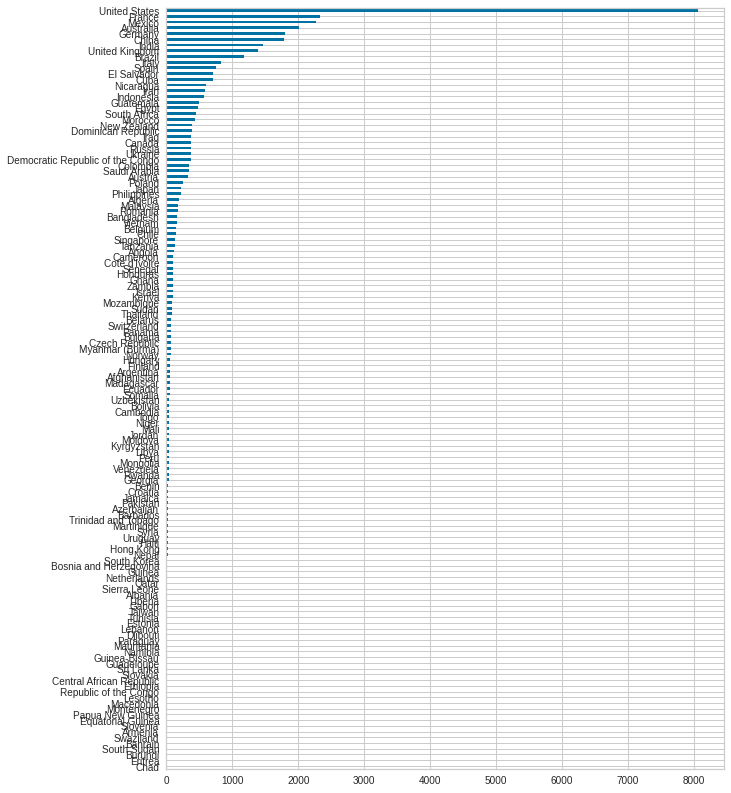

In [7]:
plt.figure(figsize=(10,14))
gs['country'].value_counts(ascending=True).plot(kind='barh');

**Only pick from United States**

In [8]:
gs = gs.query('country == "United States"')

**Check null values inside dataset**

In [9]:
gs.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
postal_code       0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [10]:
gs.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
8,40155,CA-2014-135909,2014-10-14T00:00:00Z,2014-10-21T00:00:00Z,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
10,34577,CA-2011-102988,2011-04-05T00:00:00Z,2011-04-09T00:00:00Z,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,...,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.050,5,0.0,83.2810,846.54,High
16,36178,CA-2014-143567,2014-11-03T00:00:00Z,2014-11-06T00:00:00Z,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,...,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,780.70,Critical
21,31784,CA-2011-154627,2011-10-29T00:00:00Z,2011-10-31T00:00:00Z,First Class,SA-20830,Sue Ann Reed,Consumer,Chicago,Illinois,...,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,6,0.2,341.9940,752.51,High


In [11]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8058 entries, 0 to 51287
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          8058 non-null   int64  
 1   order_id        8058 non-null   object 
 2   order_date      8058 non-null   object 
 3   ship_date       8058 non-null   object 
 4   ship_mode       8058 non-null   object 
 5   customer_id     8058 non-null   object 
 6   customer_name   8058 non-null   object 
 7   segment         8058 non-null   object 
 8   city            8058 non-null   object 
 9   state           8058 non-null   object 
 10  country         8058 non-null   object 
 11  postal_code     8058 non-null   float64
 12  market          8058 non-null   object 
 13  region          8058 non-null   object 
 14  product_id      8058 non-null   object 
 15  category        8058 non-null   object 
 16  sub_category    8058 non-null   object 
 17  product_name    8058 non-null   

# NOMOR 1

## A 
**Kategori barang seperti apa yang memiliki jumlah penjualan terbesar dan penyumbang profit terbesar? Ambil top 80% berdasarkan perhitungan Pareto**

**Kategori barang yang memiliki jumlah penjualan terbesar**

In [12]:
# create Sales
gs["Sales"] = (((1 - gs["discount"]) * (gs["sales"])) + (gs["shipping_cost"])) * (gs["quantity"])

# Sum Sales for each category
gs_CategorySales = gs.groupby('category', as_index=False).Sales.sum().sort_values(by='Sales', ascending = False)

gs_CategorySales["cumpercentage"] = gs_CategorySales["Sales"].cumsum()/gs_CategorySales["Sales"].sum()*100

gs_CategorySales.head()

,category,Sales,cumpercentage
2,Technology,3.532813e+06,37.992548
1,Office Supplies,3.204432e+06,72.453627
0,Furniture,2.561454e+06,100.000000


Berdasarkan perhitungan Pareto, 80% jumlah penjualan berasal dari semua kategori

**Kategori barang yang memiliki profit terbesar**

In [13]:
# create Profit
gs["Profit"] = (gs["profit"]) * (gs["quantity"]) 

# Sum Profit for each category
gs_CategoryProfit = gs.groupby('category', as_index=False).Profit.sum().sort_values(by='Profit', ascending = False)

gs_CategoryProfit["cumpercentage"] = gs_CategoryProfit["Profit"].cumsum()/gs_CategoryProfit["Profit"].sum()*100

gs_CategoryProfit.head()

,category,Profit,cumpercentage
1,Office Supplies,898696.2037,40.603062
2,Technology,887756.6469,80.711874
0,Furniture,426917.6908,100.000000


Berdasarkan perhitungan Pareto, 80% profit berasal dari kategori Office Supplies dan Technology

## B
**Subkategori apa yang memiliki penjualan dan profit terbesar? Ambil top 80% berdasarkan perhitungan Pareto**

**Subkategori barang yang memiliki jumlah penjualan terbesar**

In [14]:
# Sum Sales for each sub_category
gs_SubcategorySales = gs.groupby('sub_category', as_index=False).Sales.sum().sort_values(by='Sales', ascending = False)

gs_SubcategorySales["cumpercentage"] = gs_SubcategorySales["Sales"].cumsum()/gs_SubcategorySales["Sales"].sum()*100

gs_SubcategorySales.head(9)

,sub_category,Sales,cumpercentage
13,Phones,1.450370e+06,15.597561
5,Chairs,1.170249e+06,28.182638
14,Storage,9.478287e+05,38.375770
0,Accessories,8.907075e+05,47.954609
3,Binders,8.206460e+05,56.779994
6,Copiers,6.326838e+05,63.583998
16,Tables,6.249296e+05,70.304611
1,Appliances,5.700577e+05,76.435121
11,Machines,5.590513e+05,82.447266


Berdasarkan perhitungan Pareto, 80% penjualan berasal dari sub category diatas. Oleh karena itu fokus pemasarannya hanya pada sub category diatas saja untuk mendapatkan 80% dari penjualan dan sub category lainnya bisa diabaikan.

**Subkategori barang yang memiliki profit terbesar**

In [15]:
# Sum Profit for each sub_category
gs_SubcategoryProfit = gs.groupby('sub_category', as_index=False).Profit.sum().sort_values(by='Profit', ascending = False)

gs_SubcategoryProfit["cumpercentage"] = gs_SubcategoryProfit["Profit"].cumsum()/gs_SubcategoryProfit["Profit"].sum()*100

gs_SubcategoryProfit.head(9)

,sub_category,Profit,cumpercentage
3,Binders,342034.4273,15.453103
13,Phones,252975.2523,26.882516
6,Copiers,251546.3027,38.247368
0,Accessories,218899.5486,48.137242
5,Chairs,196972.7612,57.036464
12,Paper,168006.8437,64.627007
11,Machines,164335.5433,72.051681
14,Storage,142270.8472,78.479473
1,Appliances,137963.0916,84.712640


Berdasarkan perhitungan Pareto, 80% profit berasal dari sub category diatas. Oleh karena itu fokus pemasarannya hanya pada sub category diatas saja untuk mendapatkan 80% dari profit yang didapatkan dan sub category lainnya bisa diabaikan.

##C
**Dari region manakah penyumbang profit terbesar? Ambil top 80% berdasarkan perhitungan Pareto**

In [16]:
# Sum Profit for each region
gs_RegionProfit = gs.groupby('region', as_index=False).Profit.sum().sort_values(by='Profit', ascending = False)

gs_RegionProfit["cumpercentage"] = gs_RegionProfit["Profit"].cumsum()/gs_RegionProfit["Profit"].sum()*100

gs_RegionProfit.head()

,region,Profit,cumpercentage
1,East,692040.1235,31.266347
3,West,643502.0268,60.339745
0,Central,499166.0619,82.892050
2,South,378662.3292,100.000000


Berdasarkan perhitungan Pareto, 80% profit berasal dari region East, Central, dan West

##D
**Kota mana saja penyumbang profit terbesar? Ambil top 80% berdasarkan perhitungan Pareto**

In [17]:
# Sum Profit for each city
gs_CityProfit = gs.groupby('city', as_index=False).Profit.sum().sort_values(by='Profit', ascending = False)

gs_CityProfit["cumpercentage"] = gs_CityProfit["Profit"].cumsum()/gs_CityProfit["Profit"].sum()*100

gs_CityProfit.head(66)

,city,Profit,cumpercentage
320,New York City,321851.9727,14.541260
258,Los Angeles,156350.7125,21.605180
435,Seattle,146841.6950,28.239482
118,Detroit,100688.4130,32.788581
422,San Francisco,90887.6415,36.894881
...,...,...,...
36,Bellingham,5826.7522,79.128400
335,Oklahoma City,5613.5835,79.382022
153,Fresno,5581.2115,79.634181
148,Fort Worth,5569.0989,79.885792


Berdasarkan perhitungan Pareto, 80% profit berasal dari kota diatas. Sehingga fokus pemasarannya hanya pada kota diatas saja karena kota diatas merupakan penyumbang 80% dari total profit yang didapatkan.

## E
**Kategori dan subkategori apa saja yang paling sering dibeli karena diskon? Ambil top 80% berdasarkan perhitungan Pareto**

In [18]:
# create Total Discount
gs["TotalDiscount"] = (gs["discount"]) * (gs["sales"]) * (gs["quantity"])

# Sum Total Discount for each category
gs_CategoryDiscount = gs.groupby('category', as_index=False).TotalDiscount.sum().sort_values(by='TotalDiscount', ascending = False)

gs_CategoryDiscount["cumpercentage"] = gs_CategoryDiscount["TotalDiscount"].cumsum()/gs_CategoryDiscount["TotalDiscount"].sum()*100

gs_CategoryDiscount.head()

,category,TotalDiscount,cumpercentage
2,Technology,329630.409800,47.762866
0,Furniture,187317.503575,74.904842
1,Office Supplies,173191.601100,100.000000


Berdasarkan perhitungan Pareto, 80% kategori yang sering dibeli karena diskon berasal dari semua kategori

In [19]:
# Sum Total Discount for each sub_category
gs_SubcategoryDiscount = gs.groupby('sub_category', as_index=False).TotalDiscount.sum().sort_values(by='TotalDiscount', ascending = False)

gs_SubcategoryDiscount["cumpercentage"] = gs_SubcategoryDiscount["TotalDiscount"].cumsum()/gs_SubcategoryDiscount["TotalDiscount"].sum()*100

gs_SubcategoryDiscount.head(8)

,sub_category,TotalDiscount,cumpercentage
13,Phones,179567.883200,26.019070
5,Chairs,102526.030300,40.874911
3,Binders,79701.350400,52.423496
6,Copiers,73030.928800,63.005549
0,Accessories,40510.638400,68.875470
16,Tables,37762.303300,74.347161
11,Machines,36520.959400,79.638983
4,Bookcases,31923.734775,84.264676


Berdasarkan perhitungan Pareto, 80% sub kategori yang sering dibeli karena diskon berasal dari sub kategori diatas. Selain sub category diatas, pemberian diskon tidak terlalu berpengaruh pada penjualan

# NOMOR 2

**Anda berpikir bahwa RFM mungkin metode segmentasi yang tepat karena selain cepat untuk dilakukan juga lebih targeted. Buatlah segmentasi RFM dan analisis segmentasi yang terbentuk. Buatlah segmentasi berdasarkan RFM score yang
dibentuk dan berikan alasan anda terkait pembuatan cluster assignment tersebut**

**Turn "order_date" into date type and create Monetary**

In [20]:
gs["order_date"] = pd.to_datetime(gs['order_date'])

In [21]:
gs['Monetary'] = (1 - gs["discount"]) * (gs["sales"]) * (gs["quantity"])

**Put maximum date as time for analysis**

In [22]:
analysis_date = gs['order_date'].max()

**Create data object for rfm modeling**

In [23]:
data_rfm = gs.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (analysis_date - x.max()).days,
        'order_id': 'count',
        'Monetary': 'sum'}).query("Monetary > 0")

data_rfm.rename(columns={'order_date': 'Recency',
                         'order_id': 'Frequency'}, inplace=True)

data_rfm

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,10,3695.64640
1,AA-10375,19,15,2583.99800
2,AA-10480,259,12,5484.60480
3,AA-10645,55,15,16940.31125
4,AB-10015,415,5,1949.48960
...,...,...,...,...
787,XP-21865,43,27,7132.54200
788,YC-21895,4,8,26323.57080
789,YS-21880,9,11,38824.68640
790,ZC-21910,54,18,29446.60960


**Create RFM segmentation by using `rfm_table_order` function**

In [24]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_rfm['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_rfm['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_rfm['Monetary'], q=4, labels = m_labels)

In [25]:
data_rfm = data_rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [26]:
data_rfm['rfm_score'] = data_rfm[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [27]:
data_rfm['rfm_score'] = data_rfm['rfm_score'].astype('int')

**Check final result**

In [28]:
data_rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,rfm_score
0,AA-10315,184,10,3695.64640,2,2,2,222
1,AA-10375,19,15,2583.99800,4,4,1,441
2,AA-10480,259,12,5484.60480,1,3,2,132
3,AA-10645,55,15,16940.31125,3,4,4,344
4,AB-10015,415,5,1949.48960,1,1,1,111


**Heatmap Visualization**

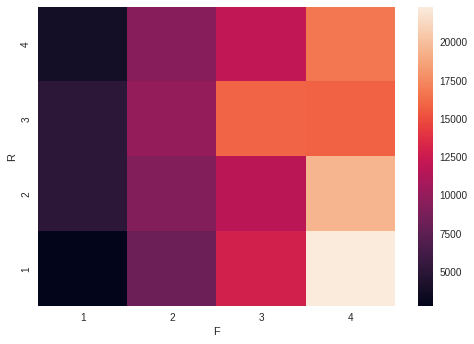

In [29]:
sns.heatmap(
    pd.pivot_table(data_rfm[["R", "F","Monetary"]], values = "Monetary", index = ["R"], columns = ["F"])
)

**RFM Distribution**

In [30]:
rfm_bar_data = data_rfm[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


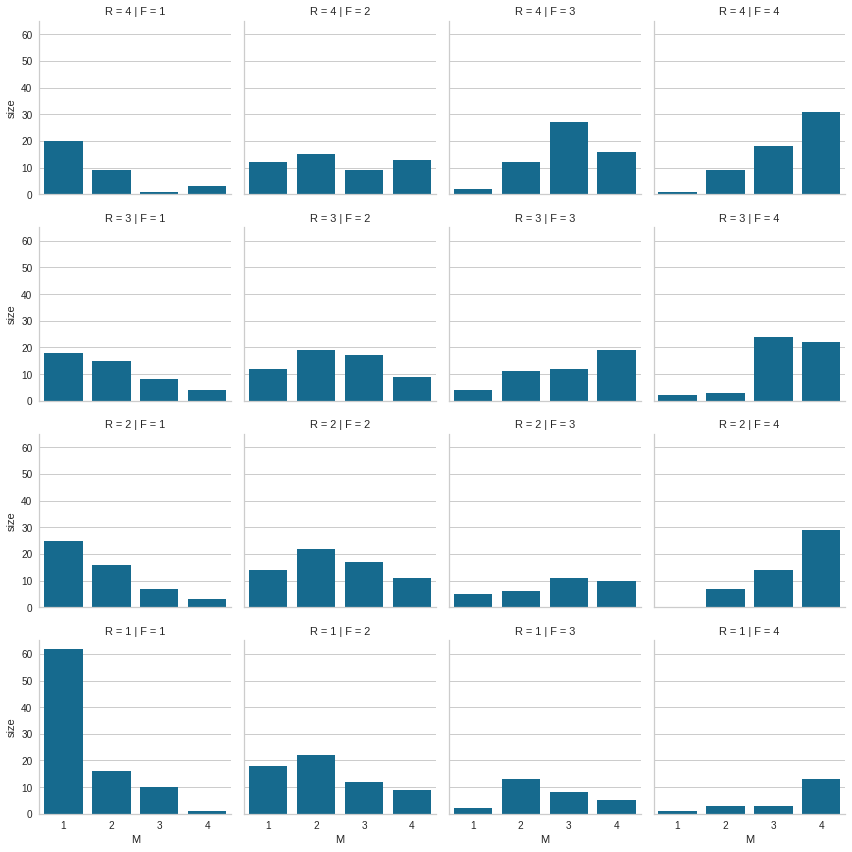

In [31]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

**Recency, Frequency, and GMV Distribution**

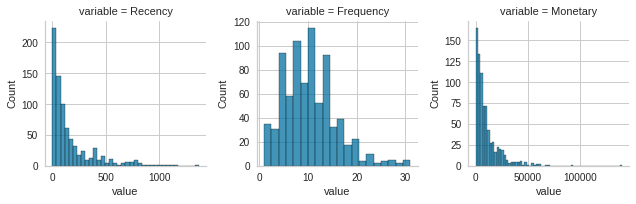

In [32]:
g = sns.FacetGrid(
    data = pd.melt(
     data_rfm[["Recency", "Frequency","Monetary"]],
     value_vars=["Recency","Frequency", "Monetary"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

**RFM Score to RFM Segment**

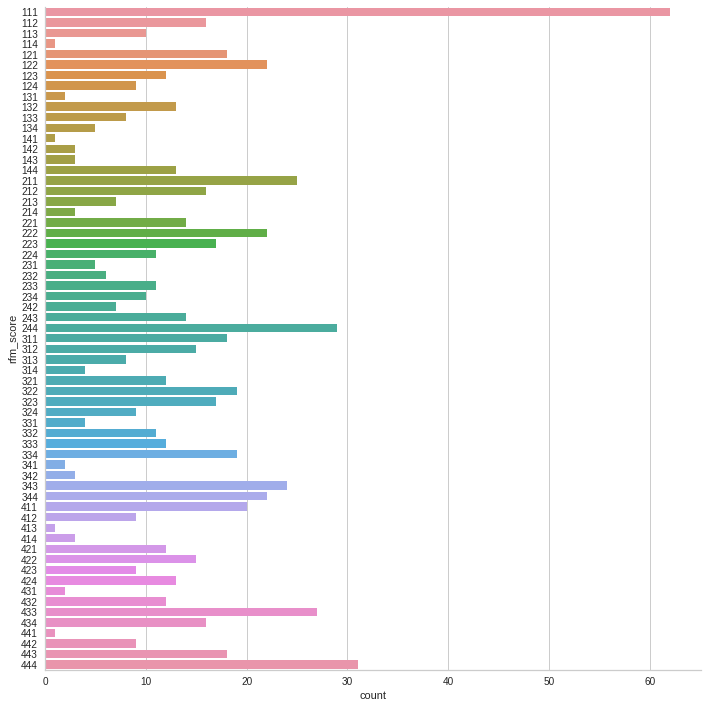

In [33]:
sns.catplot(
    y = "rfm_score", 
    data = data_rfm.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [34]:
data_rfm['rfm_segment'] = np.select(
    [
     data_rfm['rfm_score'].isin([444, 442, 443, 441, 434, 424, 414, 344, 244, 144]),
     data_rfm['rfm_score'].isin([433, 432, 423, 343, 342, 334, 333, 332, 324, 323, 243, 234, 233]),
     data_rfm['rfm_score'].isin([431, 422, 421, 413, 412, 341, 331, 322, 321, 314, 313, 312, 242, 232, 231, 224, 223, 222, 221, 214, 213, 212, 143, 142, 134, 133, 132, 124, 123, 122]),
     data_rfm['rfm_score'].isin([411, 311, 211, 141, 131, 121, 114, 113, 112, 111])
    ],
    [
     'Platinum',
     'Gold',
     'Silver',
     'Classic'
    ]
)

*   Customer Platinum : Customer yang memiliki skor RFM tinggi sebesar 4. Ada beberapa customer yang memiliki ranking recency, frequency, atau monetary 1-3 tetapi skor lainnya tinggi
*   Customer Gold : Customer yang memiliki skor RFM nya cukup tinggi sebesar 2 dan 3 tetapi ada beberapa customer yang ranking recency, frequency, atau monetary tinggi.
*   Customer Silver : Customer yang memiliki skor RFM nya beragam dan memiliki ranking recency, frequency, atau monetary yang rendah
*   Customer Classic : Customer yang memiliki skor RFM rendah bernilai 1

In [35]:
data_rfm

,customer_id,Recency,Frequency,Monetary,R,F,M,rfm_score,rfm_segment
0,AA-10315,184,10,3695.64640,2,2,2,222,Silver
1,AA-10375,19,15,2583.99800,4,4,1,441,Platinum
2,AA-10480,259,12,5484.60480,1,3,2,132,Silver
3,AA-10645,55,15,16940.31125,3,4,4,344,Platinum
4,AB-10015,415,5,1949.48960,1,1,1,111,Classic
...,...,...,...,...,...,...,...,...,...
787,XP-21865,43,27,7132.54200,3,4,3,343,Gold
788,YC-21895,4,8,26323.57080,4,2,4,424,Platinum
789,YS-21880,9,11,38824.68640,4,3,4,434,Platinum
790,ZC-21910,54,18,29446.60960,3,4,4,344,Platinum


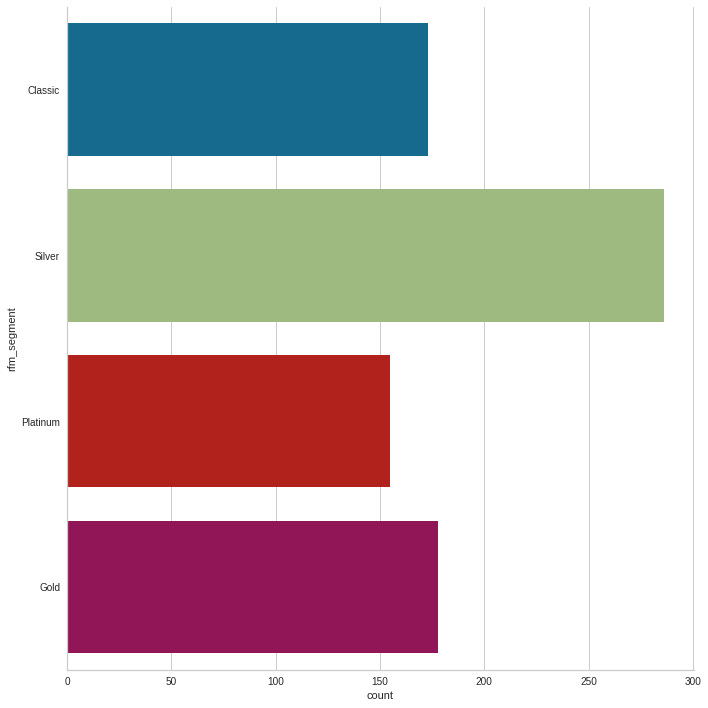

In [36]:
sns.catplot(
    y = "rfm_segment", 
    data = data_rfm.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

# NOMOR 3

**(Open-Ended) Data manager di tim Growth berfikir bahwa kita bisa membentuk segmentasi lain berdasarkan data yang ada. Anda diminta kembali untuk membuat segmentasi lain dengan tujuan untuk membuat strategi marketing yang tepat pada segmen-segmen berikut. Buatlah segmentasi menggunakan beberapa data yang ada lalu jelaskan mengapa anda menyarankan segmentasi tersebut dan apa aksi yang bisa kita lakukan terhadap segmentasi yang sudah dibuat!**

**Data standarization using StandardScaler**

In [37]:
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(data_rfm[["Recency", "Frequency", "Monetary"]].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = ["Recency", "Frequency", "Monetary"])

**Check standardize data**

In [38]:
data_for_kmeans

,Recency,Frequency,Monetary
0,0.068694,-0.032425,-0.547484
1,-0.709740,0.898040,-0.636368
2,0.422527,0.339761,-0.404445
3,-0.539900,0.898040,0.511516
4,1.158501,-0.962890,-0.687101
...,...,...,...
787,-0.596513,3.131155,-0.272681
788,-0.780507,-0.404611,1.261770
789,-0.756918,0.153668,2.261319
790,-0.544618,1.456318,1.511478


## Cluster Visualization

**Dimensionality reduction using principal component analysis**

In [39]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)

**PCA result**

In [40]:
pca_model.explained_variance_ratio_

array([0.53477024, 0.29069015, 0.1745396 ])

In [41]:
pca_result

array([[-0.37233177, -0.25544246, -0.31879083],
       [ 0.56002777, -0.86004603, -0.81354786],
       [-0.21012225,  0.14938329, -0.6253605 ],
       ...,
       [ 1.77471892,  0.66853846,  1.45379854],
       [ 2.10053084,  0.5378466 , -0.02302136],
       [-0.4518174 , -0.12127306, -0.12304613]])

## Cluster Evaluation

**Silhouette Method**

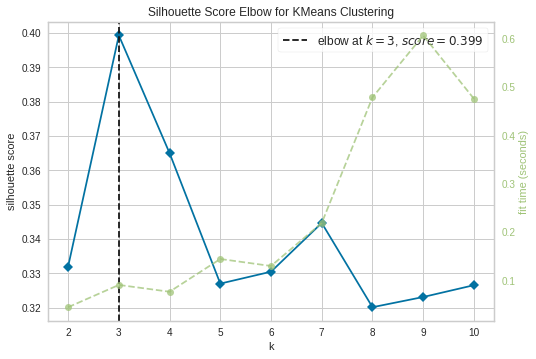

In [42]:
model = KElbowVisualizer(KMeans(random_state=1000), k=10, metric = "silhouette")
model.fit(data_for_kmeans)
model.show()

## K-Means Modeling

Create clusters using k-means by setting k = 3

In [43]:
kmeans_model = KMeans(
    n_clusters = 3,
    random_state=1000
)

kmeans_model.fit(data_for_kmeans)

KMeans(n_clusters=3, random_state=1000)

Check frequencies of each cluster

In [44]:
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([191, 114, 487]))

Assign cluster to "cluster" column

In [45]:
data_rfm["cluster"] = kmeans_model.labels_

## Post-Modeling Analysis

Total users per segment

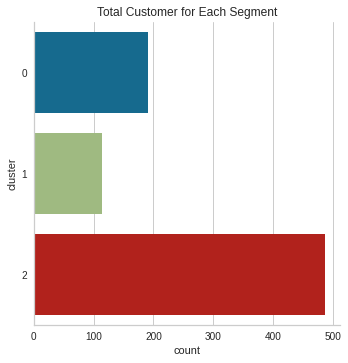

In [46]:
sns.catplot(
    y = "cluster", 
    data = data_rfm, 
    kind = "count", 
    height = 5
).ax.set_title("Total Customer for Each Segment");

**Recency Days Distribution of Each Segment**

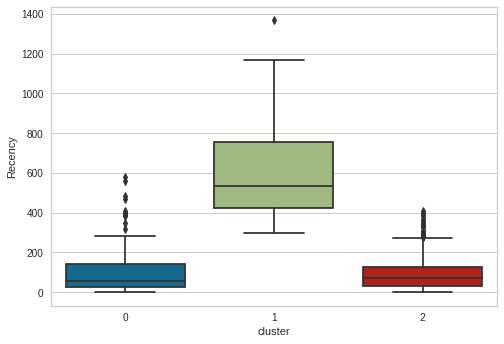

In [47]:
sns.boxplot(x = 'cluster', y = 'Recency', data = data_rfm)

**Transaction Frequency Distribution of Each Segment**

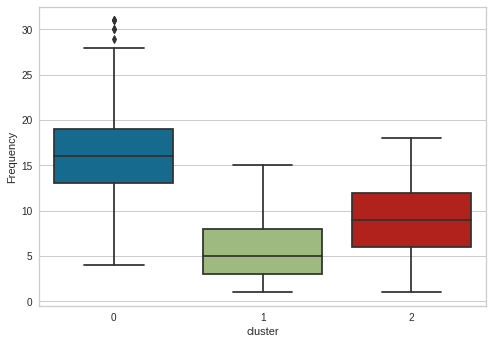

In [48]:
sns.boxplot(x = 'cluster', y = 'Frequency', data = data_rfm)

**GMV Distribution of Each Segment**

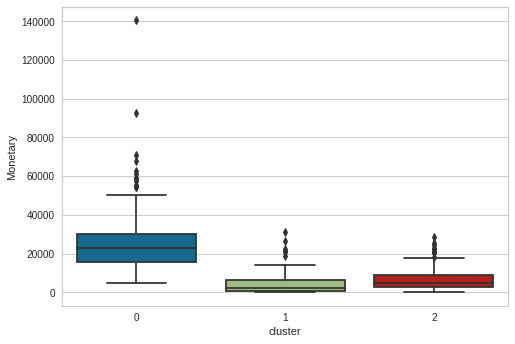

In [49]:
sns.boxplot(x = 'cluster', y = 'Monetary', data = data_rfm)

Visualize cluster

In [50]:
pca_result = pd.DataFrame(pca_result, columns = ["PC1", "PC2", "PC3"])
pca_result['cluster'] = kmeans_model.labels_

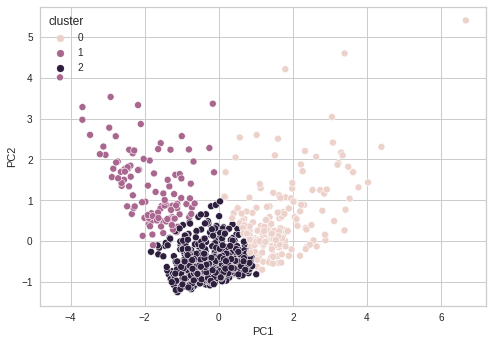

In [51]:
sns.scatterplot(data = pca_result, x = "PC1", y = "PC2", hue = "cluster");

Visualization by using convex hull

In [52]:
centroids = kmeans_model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
colors = ['#DF2020', '#81DF20', '#2095DF']
pca_result['c'] = pca_result.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

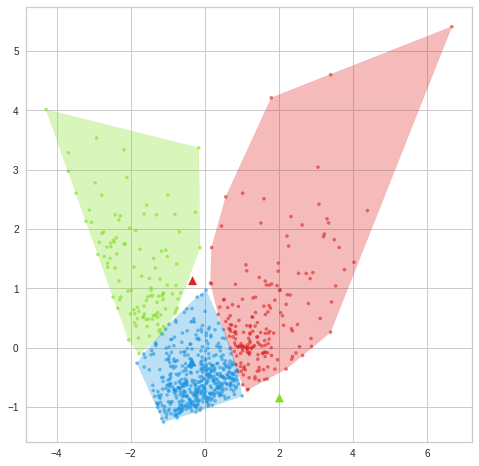

In [53]:
fig, ax = plt.subplots(1, figsize=(8,8))

plt.scatter(pca_result.PC1, pca_result.PC2, c=pca_result.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# draw enclosure
for i in pca_result.cluster.unique():
    points = pca_result[pca_result.cluster == i][['PC1', 'PC2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

## Biplot

In [54]:
def myplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [55]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)

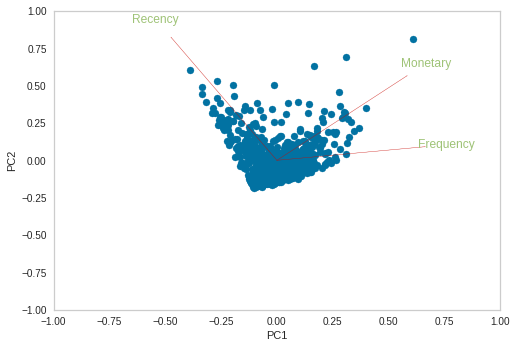

In [56]:
myplot(pca_result[:,0:2],np.transpose(pca_model.components_[0:2, :]), labels = ["Recency", "Frequency", "Monetary"])
plt.show()

In [57]:
pca_result

array([[-0.37233177, -0.25544246, -0.31879083],
       [ 0.56002777, -0.86004603, -0.81354786],
       [-0.21012225,  0.14938329, -0.6253605 ],
       ...,
       [ 1.77471892,  0.66853846,  1.45379854],
       [ 2.10053084,  0.5378466 , -0.02302136],
       [-0.4518174 , -0.12127306, -0.12304613]])